In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine_data=pd.read_csv(r"C:\Users\user\Downloads\Wine_clust.csv")

In [3]:
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
wine_data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
wine_data.shape

(178, 13)

# Scailing The Data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
 
features =scaler.fit(wine_data)
features =features.transform(wine_data)
 
# Convert to pandas Dataframe
scaled_wine_data =pd.DataFrame(features,columns=wine_data.columns)
# Print the scaled data
scaled_wine_data.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


# Elbow Method

F:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


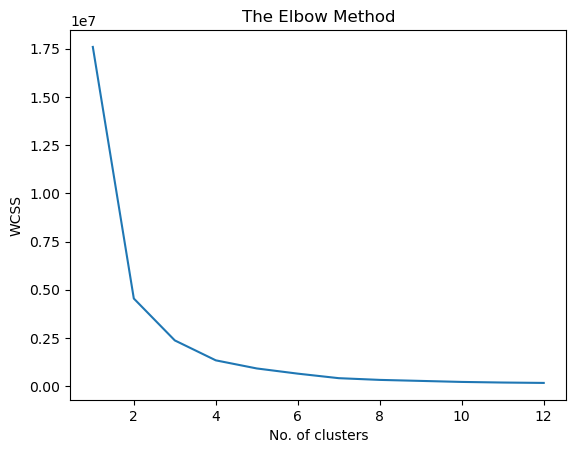

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(wine_data)
    wcss.append(kmeans.inertia_)
     
plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

As we can see from the above graph that there is turning like an elbow 
at k=3. So, we can say that the right number of cluster for the given
datasets is 4.

# KMean Clustering

In [9]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(wine_data)

In [10]:
y_kmeans

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2])

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
sil_ahc= silhouette_score(wine_data,y_kmeans)

In [13]:
sil_ahc

0.5572288268257268

# Principal Component Analysis

In [14]:
from sklearn.datasets import load_wine

In [15]:
wine_data=load_wine()

In [16]:
dir(wine_data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [17]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [18]:
inputs=wine_data.data

In [19]:
output=wine_data.target

In [20]:
inputs.shape

(178, 13)

In [21]:
output.shape

(178,)

In [22]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [23]:
import pandas as pd

In [24]:
df=pd.DataFrame(inputs,columns=wine_data.feature_names)

In [25]:
df=pd.concat([df,pd.DataFrame(output)],axis=1)

In [26]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [29]:
scaled_data=pd.DataFrame(scaled_data,columns=df.columns)

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca=PCA(n_components=0.97)
pca.fit(scaled_data)

F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


PCA(n_components=0.97)

In [32]:
x_pca=pca.transform(scaled_data)

F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [33]:
x_pca.shape

(178, 11)

In [34]:
pca1=PCA(n_components=10)
pca1.fit(scaled_data)
x_pca1=pca1.transform(scaled_data)

F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [35]:
x_pca1.shape

(178, 10)

In [36]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703])

In [37]:
pca1.components_

array([[-0.13632501,  0.22267638, -0.00225793,  0.22429849, -0.12463016,
        -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,  0.08931829,
        -0.27682265, -0.35052618, -0.26951525,  0.39366953],
       [-0.48416087, -0.22359095, -0.31585588,  0.01161574, -0.30055143,
        -0.06711983,  0.00131345, -0.0269887 , -0.04122256, -0.52978274,
         0.27790735,  0.16277625, -0.36605886, -0.00569041],
       [-0.20740081,  0.08879606,  0.62610236,  0.6119896 ,  0.13098458,
         0.14650775,  0.15096275,  0.16997551,  0.14987959, -0.1372663 ,
         0.08532854,  0.16620436, -0.12668685,  0.00121795],
       [-0.08191848,  0.46988824, -0.24984122,  0.07199322, -0.16321412,
         0.19098521,  0.14461667, -0.32801272,  0.46275771,  0.07211248,
        -0.43466618,  0.15672341, -0.2557949 ,  0.12246373],
       [-0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,  0.77833048,
        -0.14466563, -0.11200553, -0.43257916,  0.0915882 , -0.0462696 ,
        -0.02986657, -0.14

# Visualization

In [38]:
df.describe().style.format("{:.5f}")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
count,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000
mean,13.00062,2.33635,2.36652,19.49494,99.74157,2.29511,2.02927,0.36185,1.59090,5.05809,0.95745,2.61169,746.89326,0.93820
std,0.81183,1.11715,0.27434,3.33956,14.28248,0.62585,0.99886,0.12445,0.57236,2.31829,0.22857,0.70999,314.90747,0.77503
min,11.03000,0.74000,1.36000,10.60000,70.00000,0.98000,0.34000,0.13000,0.41000,1.28000,0.48000,1.27000,278.00000,0.00000
25%,12.36250,1.60250,2.21000,17.20000,88.00000,1.74250,1.20500,0.27000,1.25000,3.22000,0.78250,1.93750,500.50000,0.00000
50%,13.05000,1.86500,2.36000,19.50000,98.00000,2.35500,2.13500,0.34000,1.55500,4.69000,0.96500,2.78000,673.50000,1.00000
75%,13.67750,3.08250,2.55750,21.50000,107.00000,2.80000,2.87500,0.43750,1.95000,6.20000,1.12000,3.17000,985.00000,2.00000
max,14.83000,5.80000,3.23000,30.00000,162.00000,3.88000,5.08000,0.66000,3.58000,13.00000,1.71000,4.00000,1680.00000,2.00000


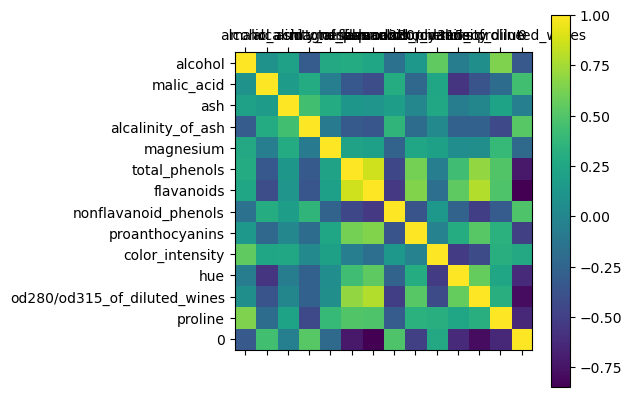

In [39]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)),df.columns)
plt.yticks(range(len(df.columns)),df.columns)
plt.colorbar()
plt.show()

# Agglomerative Hierarchical Clustering

In [40]:
import scipy.cluster.hierarchy as sch

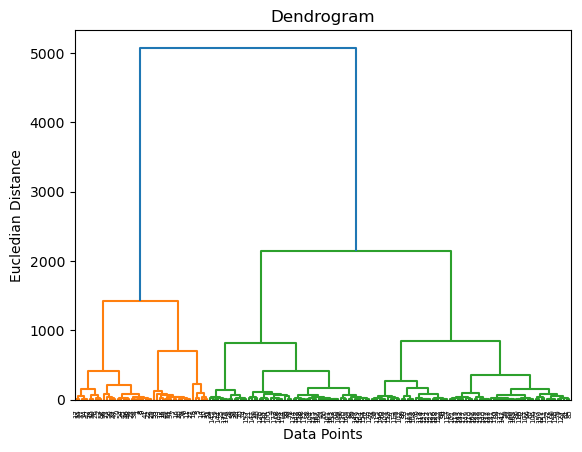

In [41]:
dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Eucledian Distance')
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering
ahc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(df)

F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [43]:
y_ahc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [44]:
from sklearn.metrics import silhouette_score
sil_ahc=silhouette_score(df,y_ahc)

In [45]:
sil_ahc

0.6587247821404869

In [46]:
ahc1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_ahc1=ahc1.fit_predict(df)
sil_ahc1=silhouette_score(df,y_ahc)
sil_ahc1

F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6587247821404869

In [47]:
ahc2=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_ahc2=ahc2.fit_predict(df)
sil_ahc2=silhouette_score(df,y_ahc)
sil_ahc2

F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6587247821404869

# DBDCAN Clustering

In [48]:
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [49]:
wine_data=datasets.load_wine()
x=wine_data.data
data=pd.DataFrame(x)

In [50]:
std_slc=StandardScaler()
x_std=std_slc.fit_transform(x)

In [51]:
clt=DBSCAN()

In [52]:
model=clt.fit(x_std)

In [53]:
Clusters=pd.DataFrame(model.fit_predict(x_std))

In [54]:
data["Cluster"]=Clusters

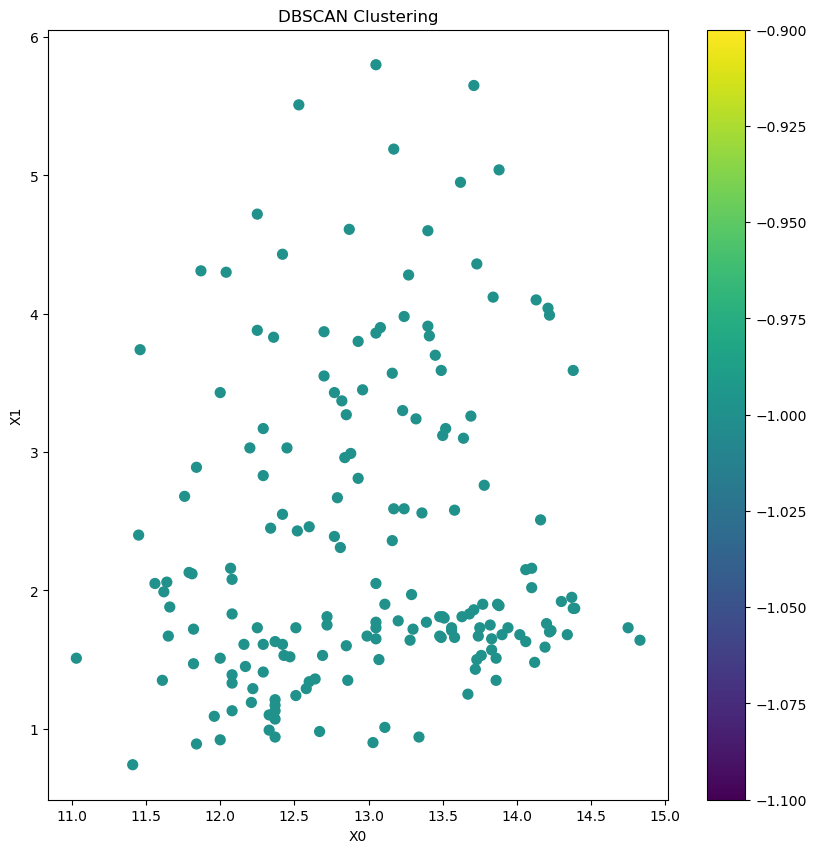

In [55]:
fig=plt.figure(figsize=(10,10));
ax=fig.add_subplot(111)
scatter=ax.scatter(data[0],data[1],c=data["Cluster"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()